In [ ]:
setwd("???")   

In [1]:
df <- read.csv("../anova2_data/tomato.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")
df

Yield,Density,Variety
10.5,10000,H
9.2,10000,H
7.9,10000,H
8.1,10000,Ife
8.6,10000,Ife
10.1,10000,Ife
16.1,10000,P
15.3,10000,P
17.5,10000,P
12.8,20000,H


In [2]:
varietyFactor <- factor(df$Variety)
densityFactor <- factor(df$Density)
anovaResult <- aov(df$Yield ~ varietyFactor * densityFactor, data=df)
summary(anovaResult)

                            Df Sum Sq Mean Sq F value   Pr(>F)    
varietyFactor                2  327.6  163.80 103.343 1.61e-12 ***
densityFactor                3   86.7   28.90  18.231 2.21e-06 ***
varietyFactor:densityFactor  6    8.0    1.34   0.845    0.548    
Residuals                   24   38.0    1.58                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [3]:
qf(0.01, 6, 24, lower.tail=F)   # interaction

[1] 3.666717

In [4]:
qf(0.01, 2, 24, lower.tail=F)   # variety

[1] 5.613591

In [5]:
qf(0.01, 3, 24, lower.tail=F)   # density

[1] 4.718051

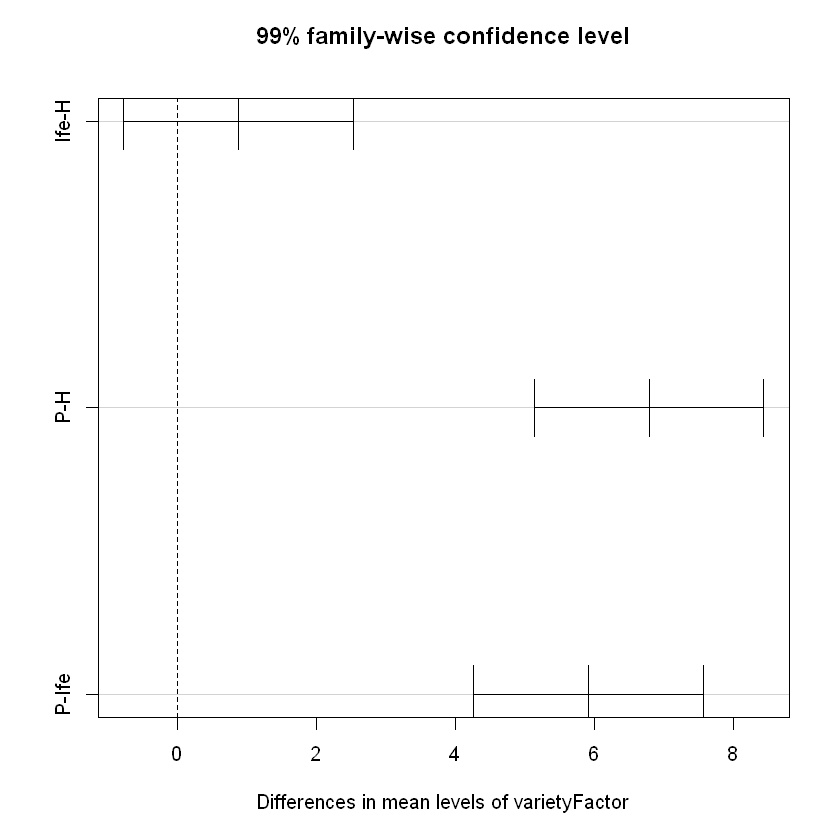

In [6]:
tk1 <- TukeyHSD(anovaResult, 'varietyFactor', conf.level = 0.99)
plot(tk1)

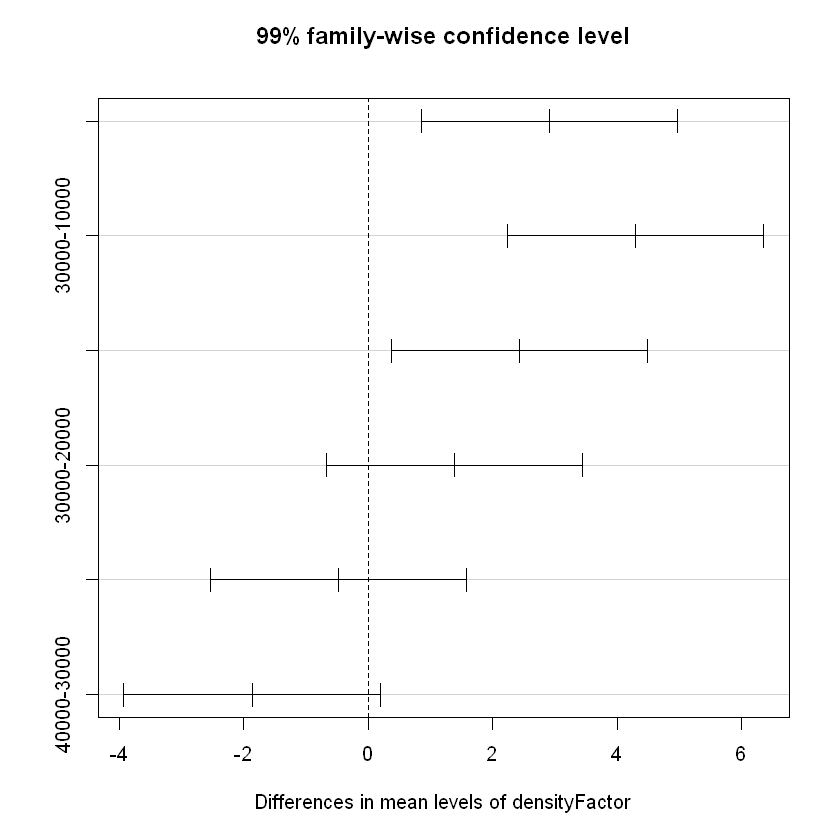

In [7]:
tk2 <- TukeyHSD(anovaResult, 'densityFactor', conf.level = 0.99)
plot(tk2)

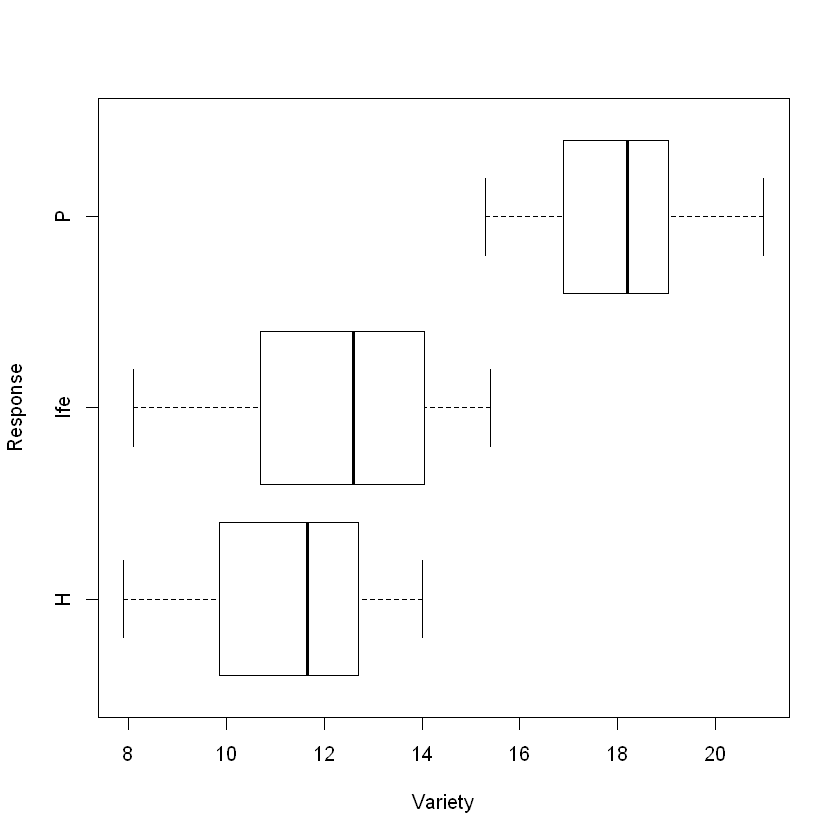

In [8]:
boxplot(df$Yield~df$Variety, horizontal=T,xlab="Variety", ylab="Response")


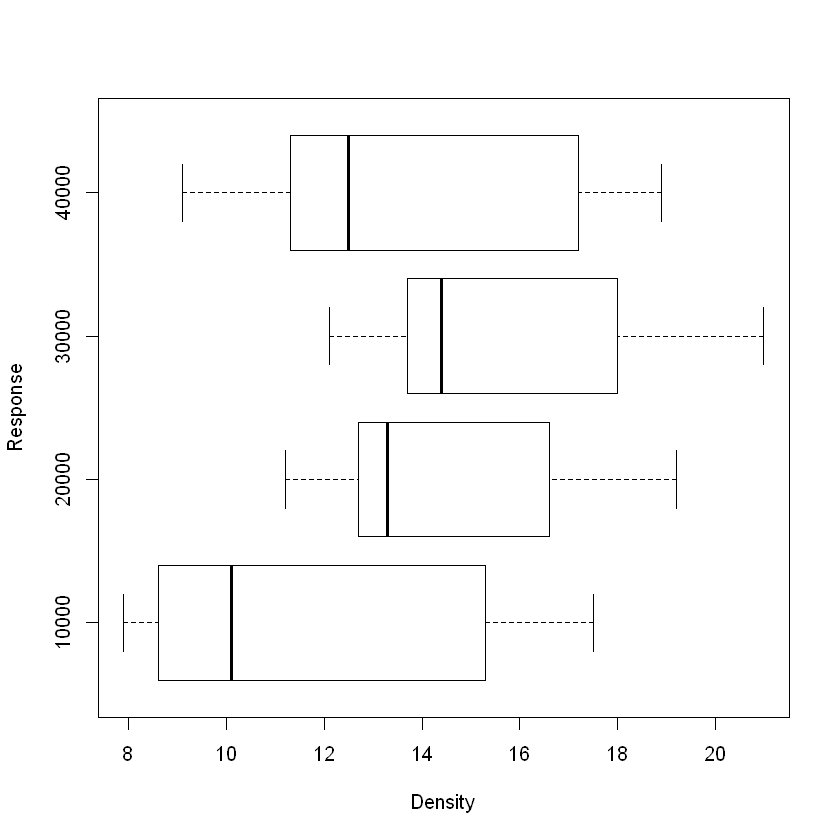

In [9]:
boxplot(df$Yield~df$Density, horizontal=T, xlab="Density", ylab="Response")

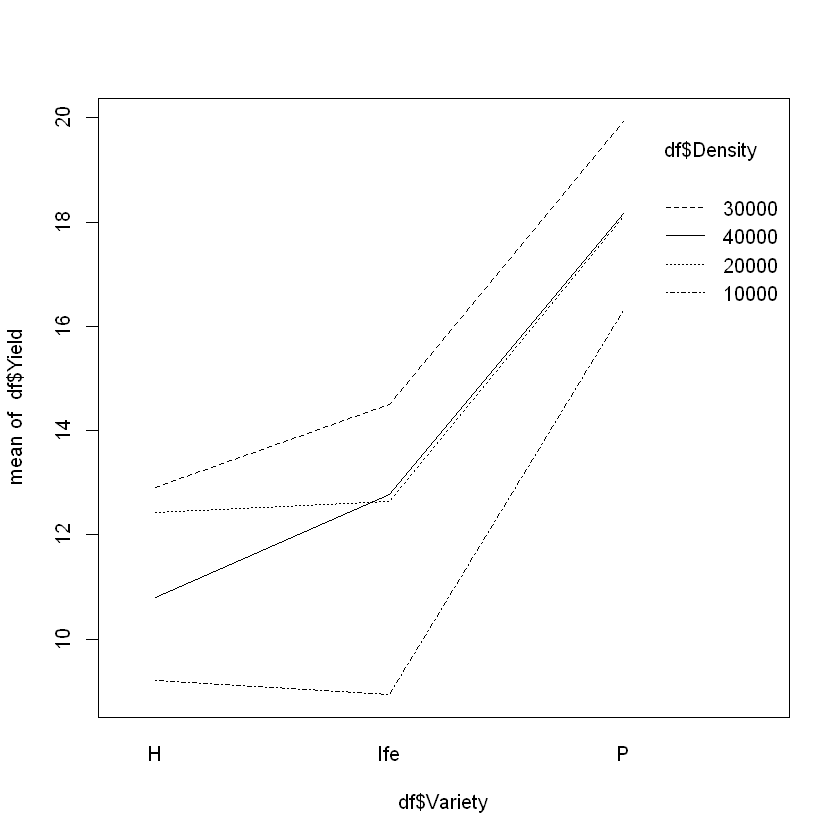

In [10]:
interaction.plot(df$Variety, df$Density, df$Yield)